In [1]:
import numba
import sys
sys.path.insert(0, '../../python_lib')
import networkx as nx
import numpy as np
import graph_gen
import model
import random
from collections import defaultdict
import torch
import math
import solvers

In [2]:
%matplotlib inline

In [3]:
m = n = l = 4 # L of square grid

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


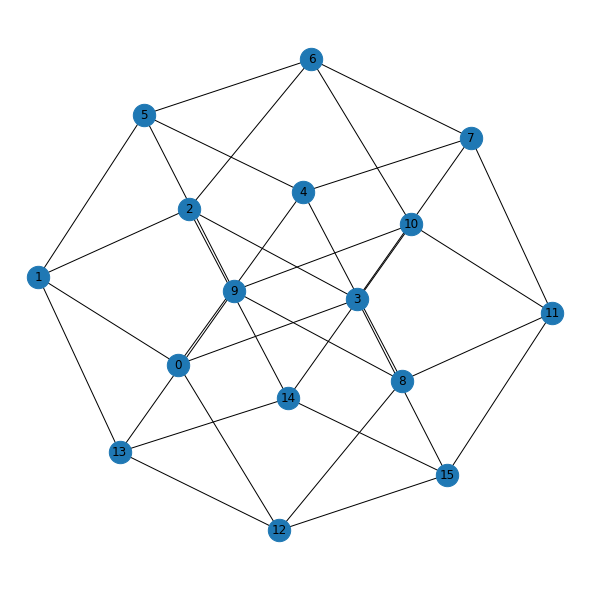

In [4]:
import imp 

import graph_gen
imp.reload(graph_gen)

periodic = True
N, J_interaction = graph_gen.grid_2d_interaction(n,m, periodic=periodic)

#H = np.random.random(N)
H=np.zeros(N)

betas_fast = np.arange(0.1,2.1,1e-1)

j_start = 1
j = graph_gen.fixed_value(j_start)
J = graph_gen.set_J(J_interaction, j)
#J_rand = graph_gen.set_J(J_interaction_rand, j)

#N_rand, J_interaction_rand = graph_gen.tree_interaction(Degree, Height, rand=True)

In [5]:
tree = model.model(N, H, J, J_interaction)

In [6]:
from save_data import save_pickle_zip
save_pickle_zip("./models/2d_ferro.pkl", tree)

In [7]:
import solvers
imp.reload(solvers)
res_ex = solvers.exact_sol(tree, betas_fast)

beta: 0.1, Fe: -7.033 Energy: -0.206 M: 0.0 S: 0.6831.12e+022
beta: 0.2, Fe: -3.679 Energy: -0.456 M: 0.0 S: 0.64458.60
beta: 0.3, Fe: -2.664 Energy: -0.844 M: 0.0 S: 0.54642.16
beta: 0.4, Fe: -2.275 Energy: -1.38 M: 3.45e-18 S: 0.3588
beta: 0.5, Fe: -2.138 Energy: -1.76 M: 0.0 S: 0.191-33.19
beta: 0.6, Fe: -2.089 Energy: -1.91 M: 8.12e-15 S: 0.1093
beta: 0.7, Fe: -2.068 Energy: -1.96 M: 0.0 S: 0.073132.11
beta: 0.8, Fe: -2.056 Energy: -1.98 M: 0.0 S: 0.057332.10
beta: 0.9, Fe: -2.049 Energy: -1.99 M: 0.0 S: 0.05 -32.00
beta: 1.0, Fe: -2.044 Energy: -2.0 M: 0.0 S: 0.0465-32.00
beta: 1.1, Fe: -2.040 Energy: -2.0 M: 0.0 S: 0.0449-32.00
beta: 1.2, Fe: -2.036 Energy: -2.0 M: 0.0 S: 0.0441-32.00
beta: 1.3, Fe: -2.033 Energy: -2.0 M: 0.0 S: 0.0437-32.00
beta: 1.4, Fe: -2.031 Energy: -2.0 M: 0.0 S: 0.0435-32.00
beta: 1.5, Fe: -2.029 Energy: -2.0 M: 0.0 S: 0.0434-32.00
beta: 1.6, Fe: -2.027 Energy: -2.0 M: 0.0 S: 0.0434-32.00
beta: 1.7, Fe: -2.025 Energy: -2.0 M: 0.0 S: 0.0433-32.00
beta: 1.8,

In [8]:
from save_data import save_pickle_zip
save_pickle_zip("./models/2d_ferro.pkl", tree)
save_pickle_zip("./solutions/2d_ferro.pkl", res_ex)

# Spin Glass

In [9]:
m = n = l = 4 # L of square grid

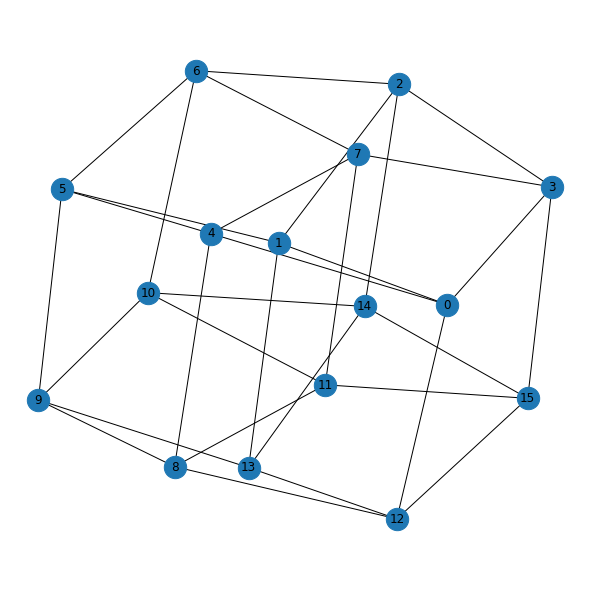

In [10]:
import imp 

import graph_gen
imp.reload(graph_gen)

periodic = True
N, J_interaction = graph_gen.grid_2d_interaction(n,m, periodic=periodic)

#H = np.random.random(N)
H=np.zeros(N)
betas_fast = np.arange(0.1,2,1e-1)

j = graph_gen.spin_glass()
J = graph_gen.set_J(J_interaction, j)
#J_rand = graph_gen.set_J(J_interaction_rand, j)

#N_rand, J_interaction_rand = graph_gen.tree_interaction(Degree, Height, rand=True)

In [11]:
imp.reload(solvers)
import model
imp.reload(model)
model_ = model.model(N, H, J, J_interaction)
res_ex = solvers.exact_sol(model_, betas_fast)

beta: 0.1, Fe: -7.049 Energy: -0.232 M: 0.0 S: 0.682-1.13e+022
beta: 0.2, Fe: -3.694 Energy: -0.442 M: 0.0 S: 0.65 -59.18
beta: 0.3, Fe: -2.640 Energy: -0.615 M: 0.0 S: 0.607-42.25
beta: 0.4, Fe: -2.151 Energy: -0.75 M: 0.0 S: 0.561 -34.45
beta: 0.5, Fe: -1.882 Energy: -0.852 M: 3.26e-16 S: 0.5156
beta: 0.6, Fe: -1.717 Energy: -0.929 M: 2.47e-16 S: 0.4732
beta: 0.7, Fe: -1.609 Energy: -0.989 M: 2.47e-16 S: 0.4342
beta: 0.8, Fe: -1.534 Energy: -1.04 M: 6.75e-16 S: 0.39956
beta: 0.9, Fe: -1.481 Energy: -1.07 M: 7.16e-16 S: 0.36779
beta: 1.0, Fe: -1.442 Energy: -1.1 M: 5.21e-16 S: 0.339.14
beta: 1.1, Fe: -1.412 Energy: -1.13 M: 8.07e-16 S: 0.31360
beta: 1.2, Fe: -1.389 Energy: -1.15 M: 7e-16 S: 0.29122.25
beta: 1.3, Fe: -1.371 Energy: -1.16 M: 6.06e-16 S: 0.27194
beta: 1.4, Fe: -1.357 Energy: -1.18 M: 6.96e-16 S: 0.25472
beta: 1.5, Fe: -1.345 Energy: -1.19 M: 4.44e-16 S: 0.23851
beta: 1.6, Fe: -1.335 Energy: -1.2 M: 4.66e-16 S: 0.225.49
beta: 1.7, Fe: -1.327 Energy: -1.2 M: 3.7e-16 S: 0.2

In [12]:
from save_data import save_pickle_zip
save_pickle_zip("./models/2d_spin_glass.pkl", model_)
save_pickle_zip("./solutions/2d_spin_glass.pkl", res_ex)

# R Field spin glass

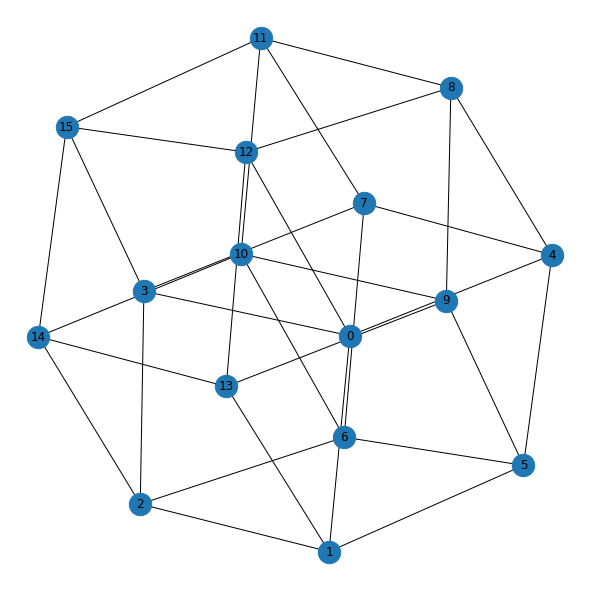

In [13]:
periodic = True
N, J_interaction = graph_gen.grid_2d_interaction(n,m, periodic=periodic)
H_intes = 5
H = H_intes * (2. * np.random.random(N) - 1)
#H=np.zeros(N)

betas_fast = np.arange(0.1,2.1,1e-1)

j = graph_gen.spin_glass()
J = graph_gen.set_J(J_interaction, j)
#J_rand = graph_gen.set_J(J_interaction_rand, j)

#N_rand, J_interaction_rand = graph_gen.tree_interaction(Degree, Height, rand=True)

In [14]:
model_ = model.model(N, H, J, J_interaction)

res_ex = solvers.exact_sol(model_, betas_fast)

beta: 0.1, Fe: -7.298 Energy: -0.715 M: 0.2 S: 0.658-1.17e+022
beta: 0.2, Fe: -4.151 Energy: -1.26 M: 0.371 S: 0.57966.41
beta: 0.3, Fe: -3.251 Energy: -1.62 M: 0.5 S: 0.489 -52.09
beta: 0.4, Fe: -2.875 Energy: -1.85 M: 0.598 S: 0.40846.09
beta: 0.5, Fe: -2.687 Energy: -2.0 M: 0.668 S: 0.343-43.00
beta: 0.6, Fe: -2.580 Energy: -2.09 M: 0.716 S: 0.29441.33
beta: 0.7, Fe: -2.515 Energy: -2.15 M: 0.749 S: 0.2580.22
beta: 0.8, Fe: -2.471 Energy: -2.18 M: 0.772 S: 0.23139.55
beta: 0.9, Fe: -2.440 Energy: -2.21 M: 0.789 S: 0.21139.00
beta: 1.0, Fe: -2.418 Energy: -2.22 M: 0.803 S: 0.19638.77
beta: 1.1, Fe: -2.401 Energy: -2.23 M: 0.813 S: 0.18338.44
beta: 1.2, Fe: -2.387 Energy: -2.24 M: 0.822 S: 0.17338.22
beta: 1.3, Fe: -2.376 Energy: -2.25 M: 0.829 S: 0.16538.00
beta: 1.4, Fe: -2.367 Energy: -2.25 M: 0.836 S: 0.15837.99
beta: 1.5, Fe: -2.360 Energy: -2.26 M: 0.841 S: 0.15237.88
beta: 1.6, Fe: -2.354 Energy: -2.26 M: 0.846 S: 0.14737.77
beta: 1.7, Fe: -2.348 Energy: -2.26 M: 0.85 S: 0.1433

In [15]:
from save_data import save_pickle_zip
save_pickle_zip("./models/2d_spin_glass_rh.pkl", model_)
save_pickle_zip("./solutions/2d_spin_glass_rh.pkl", res_ex)

# 2D ferro r field

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


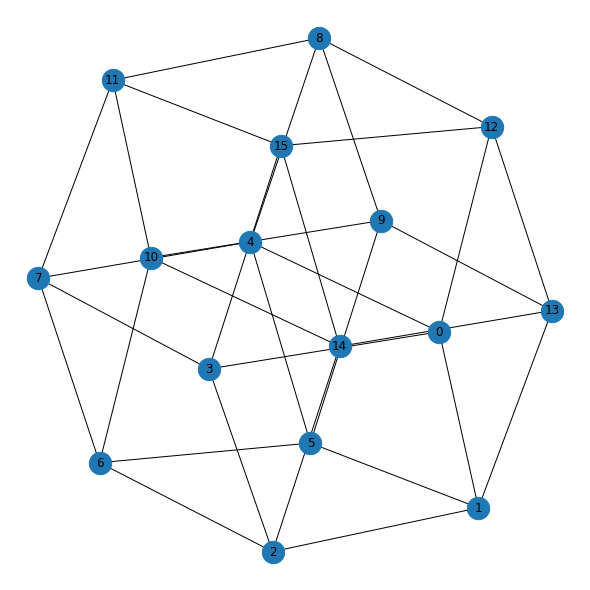

In [4]:
periodic = True
N, J_interaction = graph_gen.grid_2d_interaction(n,m, periodic=periodic)

H_coeff = 6
H = H_coeff * (1. - 2 * np.random.random(N))
#H=np.zeros(N)

betas_fast = np.arange(0.1,2.1,1e-1)
j_start = 1
j = graph_gen.fixed_value(j_start)
J = graph_gen.set_J(J_interaction, j)
#J_rand = graph_gen.set_J(J_interaction_rand, j)

#N_rand, J_interaction_rand = graph_gen.tree_interaction(Degree, Height, rand=True)

In [5]:
import imp
imp.reload(solvers)
model_ = model.model(N, H, J, J_interaction)
res_ex = solvers.exact_sol(model_, betas_fast)

beta: 0.1, Fe: -7.910 Energy: -1.96 M: 0.375 S: 0.5951.26e+02
beta: 0.2, Fe: -5.337 Energy: -3.4 M: 0.646 S: 0.388-83.7
beta: 0.3, Fe: -4.801 Energy: -3.96 M: 0.773 S: 0.25174.6
beta: 0.4, Fe: -4.622 Energy: -4.17 M: 0.844 S: 0.18-71.4
beta: 0.5, Fe: -4.542 Energy: -4.26 M: 0.887 S: 0.1390.08
beta: 0.6, Fe: -4.500 Energy: -4.32 M: 0.917 S: 0.11-69.3
beta: 0.7, Fe: -4.477 Energy: -4.35 M: 0.938 S: 0.08888.8
beta: 0.8, Fe: -4.462 Energy: -4.37 M: 0.953 S: 0.07218.6
beta: 0.9, Fe: -4.453 Energy: -4.39 M: 0.965 S: 0.05888.4
beta: 1.0, Fe: -4.447 Energy: -4.4 M: 0.973 S: 0.048168.3
beta: 1.1, Fe: -4.443 Energy: -4.41 M: 0.979 S: 0.03948.2
beta: 1.2, Fe: -4.441 Energy: -4.41 M: 0.984 S: 0.03228.2
beta: 1.3, Fe: -4.439 Energy: -4.42 M: 0.988 S: 0.02648.2
beta: 1.4, Fe: -4.437 Energy: -4.42 M: 0.99 S: 0.021668.1
beta: 1.5, Fe: -4.437 Energy: -4.42 M: 0.992 S: 0.01778.1
beta: 1.6, Fe: -4.436 Energy: -4.43 M: 0.994 S: 0.01458.1
beta: 1.7, Fe: -4.435 Energy: -4.43 M: 0.995 S: 0.01198.1
beta: 1.8,

In [6]:
from save_data import save_pickle_zip
save_pickle_zip("./models/2d_ferro_rh.pkl", model_)
save_pickle_zip("./solutions/2d_ferro_rh.pkl", res_ex)

# Jone

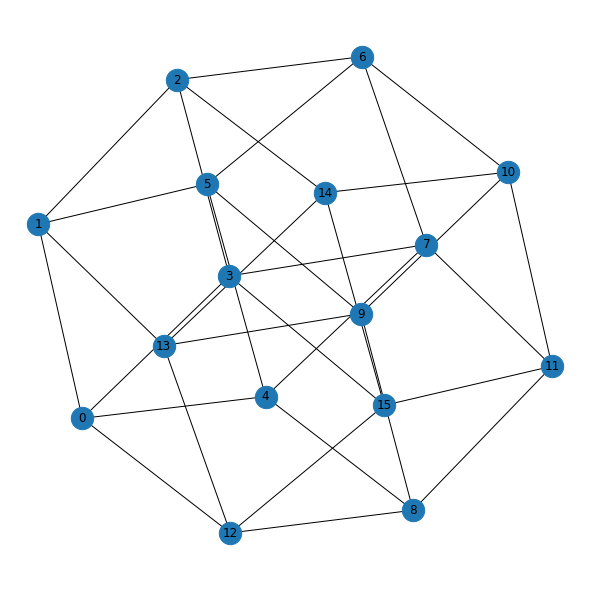

In [19]:
import graph_gen
import imp
imp.reload(graph_gen)
periodic = True
N, J_interaction = graph_gen.grid_2d_interaction(n,m, periodic=periodic)

#H = np.random.random(N)
H=np.zeros(N)

betas_fast = np.arange(0.1,2.1,1e-1)

j = graph_gen.spin_glass_one()
J = graph_gen.set_J(J_interaction, j)
#J_rand = graph_gen.set_J(J_interaction_rand, j)

#N_rand, J_interaction_rand = graph_gen.tree_interaction(Degree, Height, rand=True)

In [20]:
model_ = model.model(N, H, J, J_interaction)
res_ex = solvers.exact_sol(model_, betas_fast)

beta: 0.1, Fe: -7.031 Energy: -0.199 M: 0.0 S: 0.6831.12e+022
beta: 0.2, Fe: -3.664 Energy: -0.394 M: 0.0 S: 0.65458.63
beta: 0.3, Fe: -2.605 Energy: -0.577 M: 0.0 S: 0.60841.75
beta: 0.4, Fe: -2.119 Energy: -0.741 M: 0.0 S: 0.55133.98
beta: 0.5, Fe: -1.858 Energy: -0.878 M: 1.28e-17 S: 0.497
beta: 0.6, Fe: -1.704 Energy: -0.987 M: 2.65e-17 S: 0.432
beta: 0.7, Fe: -1.608 Energy: -1.07 M: 8.05e-16 S: 0.3787
beta: 0.8, Fe: -1.544 Energy: -1.13 M: 2.07e-17 S: 0.3351
beta: 0.9, Fe: -1.500 Energy: -1.17 M: 1.25e-17 S: 0.3010
beta: 1.0, Fe: -1.468 Energy: -1.19 M: 1.57e-17 S: 0.2755
beta: 1.1, Fe: -1.444 Energy: -1.21 M: 1.52e-17 S: 0.2551
beta: 1.2, Fe: -1.425 Energy: -1.22 M: 1.83e-16 S: 0.2418
beta: 1.3, Fe: -1.410 Energy: -1.23 M: 2.78e-17 S: 0.2366
beta: 1.4, Fe: -1.398 Energy: -1.24 M: 1.57e-17 S: 0.2234
beta: 1.5, Fe: -1.387 Energy: -1.24 M: 4.37e-17 S: 0.2172
beta: 1.6, Fe: -1.378 Energy: -1.24 M: 5.08e-16 S: 0.2137
beta: 1.7, Fe: -1.370 Energy: -1.25 M: 2.26e-17 S: 0.2199
beta: 1.8,

In [21]:
from save_data import save_pickle_zip
save_pickle_zip("./models/2d_jone.pkl", model_)
save_pickle_zip("./solutions/2d_jone.pkl", res_ex)